In [115]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd
from itertools import combinations
from functions import *

In [116]:
def calcAcc(D1):
    
    D1['number_of_letters'] = D1['correctSequence'].apply(lambda x: len(x))
    # D1[D1['number_of_letters']==3]
    accuracies = []
    for idx,row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'], row['userInput']).size / len(row['correctSequence']))
    D1['accuracies'] = np.array(accuracies)

In [117]:
def calcRecencyAcc(D1):
    n_recency = 6
    accuracies = []
    for idx, row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'][-6:], row['userInput']).size / n_recency)
    D1['recencyAccuracies'] = np.array(accuracies)

In [118]:
def calcPrimacyAcc(D1):
    n_primacy = 6
    accuracies = []
    for idx, row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'][:6], row['userInput']).size / n_primacy)
    D1['primacyAccuracies'] = np.array(accuracies)

## Comparison of recency effect

In [119]:
D1 = loadDataFrame("Ali/eksperiment1.csv")
D2 = loadDataFrame("Carl/eksperiment1.csv")
D3 = loadDataFrame("Erik/eksperiment1.csv")
D4 = loadDataFrame("Kasper/eksperiment1.csv")

df = pd.concat([D1,D2,D3,D4], ignore_index=True)
df1 = df[df["wait"] == 1].copy()
calcAcc(df1)
calcRecencyAcc(df1)
# df1.reset_index()

In [120]:
D1 = loadDataFrame("Ali/eksperiment2_WorkingMemoryFalse.csv")
D2 = loadDataFrame("Carl/eksperiment2_WorkingMemoryFalse.csv")
D3 = loadDataFrame("Erik/eksperiment2_WorkingMemoryFalse.csv")
D4 = loadDataFrame("Kasper/eksperiment2_WorkingMemoryFalse.csv")

df2 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df2)
calcRecencyAcc(df2)
# df2

In [121]:
D1 = loadDataFrame("Ali/eksperiment2_WorkingMemoryTrue.csv")
D2 = loadDataFrame("Carl/eksperiment2_WorkingMemoryTrue.csv")
D3 = loadDataFrame("Erik/eksperiment2_WorkingMemoryTrue.csv")
D4 = loadDataFrame("Kasper/eksperiment2_WorkingMemoryTrue.csv")

df3 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df3)
calcRecencyAcc(df3)
# df3

In [122]:
### Calculating the average mean accuracy in experiment 1
meanRecAcc1 = df1["recencyAccuracies"].mean()
meanRecAcc2 = df2["recencyAccuracies"].mean()
meanRecAcc3 = df3["recencyAccuracies"].mean()

means = [meanRecAcc1, meanRecAcc2, meanRecAcc3]

stdPriAcc1 = df1["recencyAccuracies"].std()
stdPriAcc2 = df2["recencyAccuracies"].std()
stdPriAcc3 = df3["recencyAccuracies"].std()

stds = [stdPriAcc1, stdPriAcc2, stdPriAcc3]

for i, exp in enumerate(["Experiment 1", "Pause", "WorkingMemory"]):
    print(f"Average mean in {exp:<20}: {means[i]:>7.4f} ± {stds[i]:.4f}")

Average mean in Experiment 1        :  0.4940 ± 0.2463
Average mean in Pause               :  0.4690 ± 0.2185
Average mean in WorkingMemory       :  0.2357 ± 0.1737


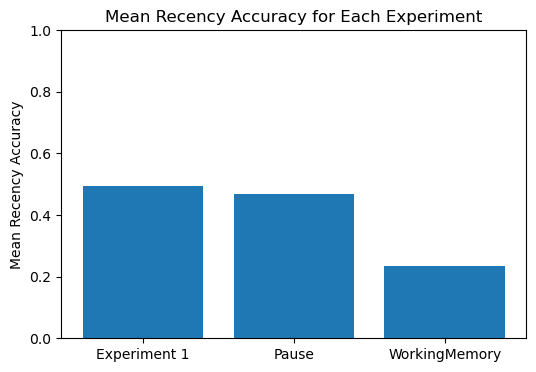

In [123]:
means = [meanRecAcc1, meanRecAcc2, meanRecAcc3]
labels = ['Experiment 1', 'Pause', 'WorkingMemory']

plt.figure(figsize=(6,4))
plt.bar(labels, means)
plt.ylabel('Mean Recency Accuracy')
plt.title('Mean Recency Accuracy for Each Experiment')
plt.ylim(0, 1)
plt.show()

In [124]:
### Performing t-test for each combination of means

stat, pval12 = stats.ttest_ind(df1['recencyAccuracies'], df2['recencyAccuracies'])
stat, pval13 = stats.ttest_ind(df1['recencyAccuracies'], df3['recencyAccuracies'])
stat, pval23 = stats.ttest_ind(df2['recencyAccuracies'], df3['recencyAccuracies'])

print(f"P-value of Experiment 1 vs Pause: {pval12:<7.4f}")
print(f"P-value of Experiment 1 vs WorkingMemory: {pval13:>7.4E}")
print(f"P-value of Pause vs WorkingMemory: {pval23:>7.4E}")

P-value of Experiment 1 vs Pause: 0.6230 
P-value of Experiment 1 vs WorkingMemory: 6.2675E-08
P-value of Pause vs WorkingMemory: 1.0560E-10


## Comparison of primacy effect
(in regards to the working memory task)

In [125]:
D1 = loadDataFrame("Ali/eksperiment1.csv")
D2 = loadDataFrame("Carl/eksperiment1.csv")
D3 = loadDataFrame("Erik/eksperiment1.csv")
D4 = loadDataFrame("Kasper/eksperiment1.csv")

df = pd.concat([D1,D2,D3,D4], ignore_index=True)
df1 = df[df["wait"] == 1].copy()
calcAcc(df1)
calcPrimacyAcc(df1)
# df1.reset_index()

In [126]:
D1 = loadDataFrame("Ali/eksperiment2_WorkingMemoryFalse.csv")
D2 = loadDataFrame("Carl/eksperiment2_WorkingMemoryFalse.csv")
D3 = loadDataFrame("Erik/eksperiment2_WorkingMemoryFalse.csv")
D4 = loadDataFrame("Kasper/eksperiment2_WorkingMemoryFalse.csv")

df2 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df2)
calcPrimacyAcc(df2)
# df2

In [127]:
D1 = loadDataFrame("Ali/eksperiment2_WorkingMemoryTrue.csv")
D2 = loadDataFrame("Carl/eksperiment2_WorkingMemoryTrue.csv")
D3 = loadDataFrame("Erik/eksperiment2_WorkingMemoryTrue.csv")
D4 = loadDataFrame("Kasper/eksperiment2_WorkingMemoryTrue.csv")

df3 = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df3)
calcPrimacyAcc(df3)
# df3

In [128]:
### Calculating the average mean accuracy in experiment 1
meanPriAcc1 = df1["primacyAccuracies"].mean()
meanPriAcc2 = df2["primacyAccuracies"].mean()
meanPriAcc3 = df3["primacyAccuracies"].mean()

means = [meanPriAcc1, meanPriAcc2, meanPriAcc3]

stdPriAcc1 = df1["primacyAccuracies"].std()
stdPriAcc2 = df2["primacyAccuracies"].std()
stdPriAcc3 = df3["primacyAccuracies"].std()

stds = [stdPriAcc1, stdPriAcc2, stdPriAcc3]

for i, exp in enumerate(["Experiment 1", "Pause", "WorkingMemory"]):
    print(f"Average mean in {exp:<20}: {means[i]:>7.4f} ± {stds[i]:.4f}")

Average mean in Experiment 1        :  0.3274 ± 0.2334
Average mean in Pause               :  0.3214 ± 0.1931
Average mean in WorkingMemory       :  0.3405 ± 0.2347


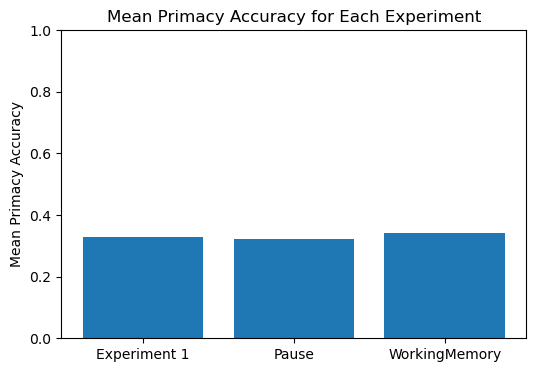

In [129]:
means = [meanPriAcc1, meanPriAcc2, meanPriAcc3]
labels = ['Experiment 1', 'Pause', 'WorkingMemory']

plt.figure(figsize=(6,4))
plt.bar(labels, means)
plt.ylabel('Mean Primacy Accuracy')
plt.title('Mean Primacy Accuracy for Each Experiment')
plt.ylim(0, 1)
plt.show()

In [130]:
### Performing t-test for each combination of means

stat, pval12 = stats.ttest_ind(df1['primacyAccuracies'], df2['primacyAccuracies'])
stat, pval13 = stats.ttest_ind(df1['primacyAccuracies'], df3['primacyAccuracies'])
stat, pval23 = stats.ttest_ind(df2['primacyAccuracies'], df3['primacyAccuracies'])

print(f"P-value of Experiment 1 vs Pause: {pval12:<7.4f}")
print(f"P-value of Experiment 1 vs WorkingMemory: {pval13:>7.4f}")
print(f"P-value of Pause vs WorkingMemory: {pval23:>7.4f}")

P-value of Experiment 1 vs Pause: 0.8971 
P-value of Experiment 1 vs WorkingMemory:  0.8032
P-value of Pause vs WorkingMemory:  0.6009
